In [104]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from tensorflow.examples.tutorials.mnist import input_data

rng = np.random.RandomState(1234)
random_state = 42

In [3]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)
mnist_X, mnist_y = mnist.train.images, mnist.train.labels
train_X, valid_X, train_y, valid_y = train_test_split(mnist_X, mnist_y, test_size=0.1, random_state=random_state)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
class Autoencoder:
    def __init__(self, vis_dim, hid_dim, function=lambda x: x):
        self.W = tf.Variable(rng.uniform(low=-0.08, high=0.08, size=(vis_dim, hid_dim)).astype('float32'), name='W')
        self.a = tf.Variable(np.zeros(vis_dim).astype('float32'), name='a')
        self.b = tf.Variable(np.zeros(hid_dim).astype('float32'), name='b')
        self.function = function
        self.params = [self.W, self.a, self.b]

    def encode(self, x):
        u = tf.matmul(x, self.W) + self.b
        return self.function(u)

    def decode(self, x):
        u = tf.matmul(x, tf.transpose(self.W)) + self.a
        return self.function(u)

    def f_prop(self, x):
        y = self.encode(x)
        return self.decode(y)

    def reconst_error(self, x, noise):
        tilde_x = x * noise
        reconst_x = self.f_prop(tilde_x)
        error = -tf.reduce_mean(tf.reduce_sum(x * tf.log(reconst_x) + (1. - x) * tf.log(1. - reconst_x), axis=1))
        return error, reconst_x

In [4]:
def sgd(cost, params, eps=np.float32(0.1)):
    g_params = tf.gradients(cost, params)
    updates = []
    for param, g_param in zip(params, g_params):
        if g_param != None:
            updates.append(param.assign_add(-eps*g_param))
    return updates

In [5]:
X = np.copy(train_X)

model = Autoencoder(X.shape[1], 500, tf.nn.sigmoid)

x = tf.placeholder(tf.float32, [None, 784], name='x')
noise = tf.placeholder(tf.float32, [None, 784], name='noise')

cost, reconst_x = model.reconst_error(x, noise)
params = model.params
updates = sgd(cost, params)
train = tf.group(*updates)

In [9]:
n_epochs = 10
batch_size = 100
n_batches = X.shape[0]//batch_size

corruption_level = np.float32(0.0)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for epoch in range(n_epochs):
        X = shuffle(X, random_state=random_state)
        err_all = []
        for i in range(n_batches):
            start = i * batch_size
            end = start + batch_size

            _noise = rng.binomial(size=X[start:end].shape, n=1, p=1-corruption_level)
            _, err = sess.run([train, cost], feed_dict={x: X[start:end], noise: _noise})
            err_all.append(err)
        print('EPOCH:%d, ERROR:%lf' % (epoch+1, np.mean(err_all)))

    weight_1 = sess.run(tf.transpose(model.W))

EPOCH:1, ERROR:90.805206
EPOCH:2, ERROR:66.593163
EPOCH:3, ERROR:61.505047
EPOCH:4, ERROR:58.992512
EPOCH:5, ERROR:57.510807
EPOCH:6, ERROR:56.539131
EPOCH:7, ERROR:55.850365
EPOCH:8, ERROR:55.332092
EPOCH:9, ERROR:54.924938
EPOCH:10, ERROR:54.595123


NameError: name 'weight_1' is not defined

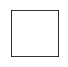

In [8]:
fig = plt.figure(figsize=(10,10))
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(weight_1[i].reshape((28, 28)), cmap='gray')

In [105]:
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from tensorflow.examples.tutorials.mnist import input_data

import numpy as np
import tensorflow as tf

del [
    tf.app,
    tf.compat,
    tf.contrib,
    tf.errors,
    tf.gfile,
    tf.graph_util,
    tf.image,
    tf.layers,
    tf.logging,
    tf.losses,
    tf.metrics,
    tf.python_io,
    tf.resource_loader,
    tf.saved_model,
    tf.sdca,
    tf.sets,
    tf.summary,
    tf.sysconfig,
    tf.test,
    tf.train
]

def load_mnist():
    mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)
    mnist_X = np.r_[mnist.train.images, mnist.test.images]
    mnist_y = np.r_[mnist.train.labels, mnist.test.labels]
    return train_test_split(mnist_X, mnist_y, test_size=0.2, random_state=42)

def validate_homework():
    train_X, test_X, train_y, test_y = load_mnist()

    # validate for small dataset
#     train_X_mini = train_X[:100]
#     train_y_mini = train_y[:100]
    train_X_mini = train_X[:500]
    train_y_mini = train_y[:500]
    test_X_mini = test_X[:100]
    test_y_mini = test_y[:100]

    pred_y = homework(train_X_mini, train_y_mini, test_X_mini)
    print(f1_score(np.argmax(test_y_mini, 1), pred_y, average='macro'))

def score_homework():
    train_X, test_X, train_y, test_y = load_mnist()
    pred_y = homework(train_X, train_y, test_X)
    print(f1_score(np.argmax(test_y, 1), pred_y, average='macro'))

AttributeError: app

In [9]:
train_X, test_X, train_y, test_y = load_mnist()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [10]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(52000, 784)
(52000, 10)
(13000, 784)
(13000, 10)


In [72]:
def homework(train_X, train_y, test_X):
    from sklearn.model_selection import train_test_split

    def sdg(cost, params, eta=np.float32(0.1)):
        g_params = tf.gradients(cost, params)
        updates = []
        for p, gp in zip(params, g_params):
            if gp is not None:
                updates.append(p.assign_add(- eta * gp))
        return updates

    class AutoEncoder:
        def __init__(self, vis_dim, hid_dim, W, function=lambda x: tf.nn.sigmoid(x)):
            self.W = W
            self.a = tf.Variable(tf.zeros(vis_dim), name='a')
            self.b = tf.Variable(tf.zeros(hid_dim), name='b')
            self.function = function

        def encode(self, x):
            u = tf.matmul(x, self.W) + self.b
            return self.function(u)

        def decode(self, x):
            return tf.matmul(x, tf.transpose(self.W)) + self.a

        def f_prop(self, x):
            y = self.encode(x)
            return self.decode(y)

        def reconst_error(self, x, noise):
            tilda_x = x * noise
            reconst_x = self.f_prop(tilda_x)
            error = - tf.reduce_mean(x * tf.log(reconst_x) + (1. - x) + tf.log(1. - reconst_x))
            return reconst_x, error

    class FCLayer:
        def __init__(self, input_dim, output_dim, layer_name, function=lambda x: tf.nn.sigmoid(x)):
            self.layer_name = layer_name
            self.input_dim, self.output_dim = input_dim, output_dim
            self.function = function

            self.W = self.def_weight([input_dim, output_dim])
            self.b = self.def_bias(output_dim)
            self._params = [self.W, self.b]

            self.autoencoder = AutoEncoder(self.input_dim, self.output_dim, self.W, self.function)

        @property
        def params(self):
            return self._params

        def f_prop(self, X):
            u = tf.matmul(X, self.W) + self.b
            return self.function(u)

        def def_weight(self, size, name='weight'):
            with tf.variable_scope(self.layer_name):
                init = tf.truncated_normal(size)
                return tf.get_variable(name, initializer=init)

        def def_bias(self, size, name='bias'):
            with tf.variable_scope(self.layer_name):
                return tf.get_variable(name, initializer=tf.zeros(size))

    tf.reset_default_graph()

    INPUT_DIM = 784
    layers = [
        FCLayer(INPUT_DIM, 200, layer_name='layer_1'),
        FCLayer(200, 100, layer_name='layer_2'),
        FCLayer(100, 50, layer_name='layer_3'),
        FCLayer(50, 10, layer_name='layer_4', function=lambda x: x),
    ]

    PRETRAIN_EPOCHS = 10
    FINE_TUNE_EPOCHS = 300
    IMAGE_DIM = 784

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        def pre_train(X, noise_rate=0.1):
            rns = np.random.RandomState(42)

            for layer_num in range(len(layers) - 1):
                input_image = tf.placeholder(tf.float32, [None, IMAGE_DIM])
                noise = tf.placeholder(tf.float32, [None, IMAGE_DIM])

                _input = input_image
                print('before', _input.shape)
                for j in range(layer_num):
                    _input = layers[j].f_prop(_input)
                print('after', _input.shape)

                _layer = layers[layer_num]
                _, cost = _layer.autoencoder.reconst_error(_input, noise)
                _updates = sdg(cost, _layer.params)
                _pre_train = tf.group(*_updates)

                for epoch in range(PRETRAIN_EPOCHS):
                    batch_size = 30
                    batch_times = X.shape[0] // batch_size
                    epoch_err = 0
                    for k in range(batch_times):
                        start_idx = k * batch_size
                        end_idx = (k + 1) * batch_size
                        _noise = rns.binomial(size=X[start_idx:end_idx].shape, n=1., p=1 - noise_rate)
                        _, c = sess.run([_pre_train, cost],
                                        feed_dict={input_image: X[start_idx:end_idx],
                                                   noise: _noise})
                        epoch_err += c
                    print("Layer: %d, Epoch: %d --- Error: %f" % (layer_num, epoch, epoch_err))

        def fine_tune(X, y):
            input_image = tf.placeholder(tf.float32, [None, IMAGE_DIM])
            actual_labels = tf.placeholder(tf.float32, [None, 10])

            next_input = input_image
            params = []
            for _layer in layers:
                next_input = _layer.f_prop(next_input)
                params.extend(_layer.params)

            output = next_input
            cost = tf.reduce_mean(tf.softmax_cross_entropy_with_logits(labels=actual_labels,
                                                                       logits=output))
            correnct = tf.equal(tf.argmax(output, axis=1), actual_labels)
            accuracy = tf.reduce_sum(tf.cast(correnct, tf.int64)) / input_image.shape[0]
            updates = sdg(cost, params)
            train = tf.group(*updates)

            for epoch in FINE_TUNE_EPOCHS:
                train_data_X, validate_data_X, train_data_y, validate_data_y =\
                    train_test_split(X, y, test_size=0.1, random_state=42)

                batch_size = 30
                batch_times = train_data_X.shape[0] // batch_size
                epoch_err = 0
                epoch_accuracy = 0

                for train_step in range(batch_times):
                    start_idx = train_step * batch_size
                    end_idx = (train_step + 1) * batch_size
                    _, c, a = sess.run([train, cost, accuracy],
                                       feed_dict={input_image: train_data_X[start_idx:end_idx],
                                                  actual_labels: train_data_y[start_idx:end_idx]})
                    epoch_err += c
                    epoch_accuracy += a

                # Validation
                _, test_a = sess.run([train, accuracy], feed_dict={input_image: validate_data_X,
                                                                   actual_labels: validate_data_y})
                print("Epoch %d out of %d: --- Train loss %f --- Train accuracy %f --- Test accuracy %f"
                      % (epoch, FINE_TUNE_EPOCHS, epoch_err, epoch_accuracy / train_step, a))

        pre_train(train_X, noise_rate=0.1)
        fine_tune(train_X, train_y)

        def infer(X):
            out = sess.run(output, feed_dict={input_image: test_X})
            return tf.argmax(out, axis=1)

        infer(test_X)

    return pred_y


In [73]:
validate_homework()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
before (?, 784)
after (?, 784)
Layer: 0, Epoch: 0 --- Error: nan
Layer: 0, Epoch: 1 --- Error: nan
Layer: 0, Epoch: 2 --- Error: nan
Layer: 0, Epoch: 3 --- Error: nan
Layer: 0, Epoch: 4 --- Error: nan
Layer: 0, Epoch: 5 --- Error: nan
Layer: 0, Epoch: 6 --- Error: nan
Layer: 0, Epoch: 7 --- Error: nan
Layer: 0, Epoch: 8 --- Error: nan
Layer: 0, Epoch: 9 --- Error: nan
before (?, 784)
after (?, 200)


ValueError: Dimensions must be equal, but are 200 and 784 for 'mul_3' (op: 'Mul') with input shapes: [?,200], [?,784].

In [74]:
class Autoencoder:
    def __init__(self, vis_dim, hid_dim, W, function=lambda x: x):
        self.W = W
        self.a = tf.Variable(np.zeros(vis_dim).astype('float32'), name='a')
        self.b = tf.Variable(np.zeros(hid_dim).astype('float32'), name='b')
        self.function = function
        self.params = [self.W, self.a, self.b]

    def encode(self, x):
        u = tf.matmul(x, self.W) + self.b
        return self.function(u)
    
    def decode(self, x):
        u = tf.matmul(x, tf.transpose(self.W)) + self.a
        return self.function(u)

    def f_prop(self, x):
        y = self.encode(x)
        return self.decode(y)

    def reconst_error(self, x, noise):
        tilde_x = x * noise
        reconst_x = self.f_prop(tilde_x)
        error = -tf.reduce_mean(tf.reduce_sum(x * tf.log(reconst_x) + (1. - x) * tf.log(1. - reconst_x), axis=1))
        return error, reconst_x


In [75]:
class Dense:
    def __init__(self, in_dim, out_dim, function):
        self.W = tf.Variable(rng.uniform(low=-0.08, high=0.08, size=(in_dim, out_dim)).astype('float32'), name='W')
        self.b = tf.Variable(np.zeros([out_dim]).astype('float32'))
        self.function = function
        self.params = [self.W, self.b]
        
        self.ae = Autoencoder(in_dim, out_dim, self.W, self.function)

    def f_prop(self, x):
        u = tf.matmul(x, self.W) + self.b
        self.z = self.function(u)
        return self.z

    def pretrain(self, x, noise):
        cost, reconst_x = self.ae.reconst_error(x, noise)
        return cost, reconst_x

In [76]:
layers = [
    Dense(784, 500, tf.nn.sigmoid),
    Dense(500, 500, tf.nn.sigmoid),
    Dense(500, 10, tf.nn.softmax)
]

In [77]:
X = np.copy(train_X)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
for l, layer in enumerate(layers[:-1]):
    corruption_level = np.float(0.3)
    batch_size = 100
    n_batches = X.shape[0] // batch_size
    n_epochs = 10

    x = tf.placeholder(tf.float32)
    noise = tf.placeholder(tf.float32)
    
    cost, reconst_x = layer.pretrain(x, noise)
    params = layer.params
    train = sgd(cost, params)
    encode = layer.f_prop(x)
    
    for epoch in range(n_epochs):
        X = shuffle(X, random_state=random_state)
        err_all = []
        for i in range(n_batches):
            start = i * batch_size
            end = start + batch_size

            _noise = rng.binomial(size=X[start:end].shape, n=1, p=1-corruption_level)
            _, err = sess.run([train, cost], feed_dict={x: X[start:end], noise: _noise})
            err_all.append(err)
        print('Pretraining:: layer: %d, Epoch: %d, Error: %lf' % (l+1, epoch+1, np.mean(err)))
    X = sess.run(encode, feed_dict={x: X})

NameError: name 'sgd' is not defined

In [78]:
x = tf.placeholder(tf.float32, [None, 784])
t = tf.placeholder(tf.float32, [None, 10])

def f_props(layers, x):
    params = []
    for layer in layers:
        x = layer.f_prop(x)
        params += layer.params
    return x, params

y, params = f_props(layers, x)

cost = -tf.reduce_mean(tf.reduce_sum(t * tf.log(y), 1))
updates = sgd(cost, params)

train = tf.group(*updates)
valid = tf.argmax(y, 1)

NameError: name 'sgd' is not defined

In [79]:
n_epochs = 10
batch_size = 100
n_batches = train_X.shape[0] // batch_size

for epoch in range(n_epochs):
    train_X, train_y = shuffle(train_X, train_y, random_state=random_state)
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        sess.run(train, feed_dict={x: train_X[start:end], t: train_y[start:end]})
    pred_y, valid_cost = sess.run([valid, cost], feed_dict={x: valid_X, t: valid_y})
    print('EPOCH: %i, Validation cost: %.3f Validation F1: %.3f' % (epoch + 1, valid_cost, f1_score(np.argmax(valid_y, 1).astype('int32'), pred_y, average='macro')))

NameError: name 'train' is not defined

In [121]:
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from tensorflow.examples.tutorials.mnist import input_data

import numpy as np
import tensorflow as tf

del [
    tf.app,
    tf.compat,
    tf.contrib,
    tf.errors,
    tf.gfile,
    tf.graph_util,
    tf.image,
    tf.layers,
    tf.logging,
    tf.losses,
    tf.metrics,
    tf.python_io,
    tf.resource_loader,
    tf.saved_model,
    tf.sdca,
    tf.sets,
    tf.summary,
    tf.sysconfig,
    tf.test,
    tf.train
]

def load_mnist():
    mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)
    mnist_X = np.r_[mnist.train.images, mnist.test.images]
    mnist_y = np.r_[mnist.train.labels, mnist.test.labels]
    return train_test_split(mnist_X, mnist_y, test_size=0.2, random_state=42)

def validate_homework():
    train_X, test_X, train_y, test_y = load_mnist()

    # validate for small dataset
#     train_X_mini = train_X[:100]
#     train_y_mini = train_y[:100]
    train_X_mini = train_X[:10000]
    train_y_mini = train_y[:10000]
    test_X_mini = test_X[:100]
    test_y_mini = test_y[:100]

    pred_y = homework(train_X_mini, train_y_mini, test_X_mini)
    print(f1_score(np.argmax(test_y_mini, 1), pred_y, average='macro'))

def score_homework():
    train_X, test_X, train_y, test_y = load_mnist()
    pred_y = homework(train_X, train_y, test_X)
    print(f1_score(np.argmax(test_y, 1), pred_y, average='macro'))

AttributeError: app

In [122]:
def homework(train_X, train_y, test_X):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import f1_score

    def sdg(cost, params, eta=np.float32(0.1)):
        g_params = tf.gradients(cost, params)
        updates = []
        for p, gp in zip(params, g_params):
            if gp is not None:
                updates.append(p.assign_add(- eta * gp))
        return updates

    class AutoEncoder:
        def __init__(self, vis_dim, hid_dim, W, function=lambda x: x):
            self.W = W
            self.a = tf.Variable(tf.zeros(vis_dim), name='a')
            self.b = tf.Variable(tf.zeros(hid_dim), name='b')
            self.function = function

        def encode(self, x):
            u = tf.matmul(x, self.W) + self.b
            return self.function(u)

        def decode(self, x):
            u = tf.matmul(x, tf.transpose(self.W)) + self.a
            return self.function(u)

        def f_prop(self, x):
            y = self.encode(x)
            return self.decode(y)

        def reconst_error(self, x, noise):
            tilde_x = x * noise
            reconst_x = self.f_prop(tilde_x)
            error = -tf.reduce_mean(
                tf.reduce_sum(x * tf.log(reconst_x) + (1. - x) * tf.log(1. - reconst_x), axis=1))
            return reconst_x, error

    class FCLayer:
        def __init__(self, input_dim, output_dim, layer_name, function=tf.nn.sigmoid):
            self.layer_name = layer_name
            self.input_dim, self.output_dim = input_dim, output_dim
            self.function = function

            self.W = tf.Variable(
                tf.truncated_normal([self.input_dim, self.output_dim], stddev=0.08), name='weight')
            self.b = tf.Variable(tf.zeros(self.output_dim), name='bias')
            self._params = [self.W, self.b]

            self.autoencoder = AutoEncoder(self.input_dim, self.output_dim, self.W, self.function)

        @property
        def params(self):
            return self._params

        def f_prop(self, X):
            u = tf.matmul(X, self.W) + self.b
            return self.function(u)

        def def_weight(self, size, name='weight'):
            with tf.variable_scope(self.layer_name):
                init = tf.truncated_normal(size)
                return tf.get_variable(name, initializer=init)

        def def_bias(self, size, name='bias'):
            with tf.variable_scope(self.layer_name):
                return tf.get_variable(name, initializer=tf.zeros(size))

    tf.reset_default_graph()

    INPUT_DIM = 784
    layers = [
        FCLayer(INPUT_DIM, 500, layer_name='layer_1', function=tf.sigmoid),
        FCLayer(500, 200, layer_name='layer_2', function=tf.sigmoid),
        FCLayer(200, 80, layer_name='layer_3', function=tf.sigmoid),
        FCLayer(80, 10, layer_name='layer_4', function=lambda x: x),
    ]

    PRETRAIN_EPOCHS = 500
    FINE_TUNE_EPOCHS = 1000
    IMAGE_DIM = 784

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        def pre_train(X, noise_rate=0.1):
            rns = np.random.RandomState(42)

            for layer_num, _layer in enumerate(layers[:-1]):
                _input = tf.placeholder(tf.float32, [None, _layer.input_dim])
                noise = tf.placeholder(tf.float32, [None, _layer.input_dim])

                _, cost = _layer.autoencoder.reconst_error(_input, noise)
                _updates = sdg(cost, _layer.params)
                pre_train = tf.group(*_updates)
                encode = _layer.f_prop(_input)

                for epoch in range(PRETRAIN_EPOCHS):
                    batch_size = 60
                    batch_times = X.shape[0] // batch_size
                    epoch_err = 0
                    for k in range(batch_times):
                        start_idx = k * batch_size
                        end_idx = (k + 1) * batch_size
                        _noise = rns.binomial(size=X[start_idx:end_idx].shape, n=1, p=1 - noise_rate)
                        _, c = sess.run([pre_train, cost],
                                        feed_dict={_input: X[start_idx:end_idx],
                                                   noise: _noise})
                        epoch_err += c
                    print("Layer: %d, Epoch: %d --- Error: %f" % (layer_num + 1, epoch + 1,
                                                                  epoch_err))

                X = sess.run(encode, feed_dict={_input: X})

        # Network flow
        input_image = tf.placeholder(tf.float32, [None, IMAGE_DIM])
        labels = tf.placeholder(tf.float32, [None, 10])

        next_input = input_image
        params = []
        for _layer in layers:
            next_input = _layer.f_prop(next_input)
            params.extend(_layer.params)

        output = next_input
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels,
                                                                      logits=output))
        predicted = tf.argmax(output, axis=1)
        _labels = tf.argmax(labels, axis=1)
        correct = tf.cast(tf.equal(predicted, _labels), tf.float32)
        accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, _labels), tf.float32))
        updates = sdg(cost, params)
        train = tf.group(*updates)

        def fine_tune(X, y):
            for epoch in range(FINE_TUNE_EPOCHS):
                train_data_X, validate_data_X, train_data_y, validate_data_y =\
                    train_test_split(X, y, test_size=0.1, random_state=42)

                batch_size = 30
                batch_times = train_data_X.shape[0] // batch_size
                epoch_err = 0
                epoch_accuracy = 0

                for train_step in range(batch_times):
                    start_idx = train_step * batch_size
                    end_idx = (train_step + 1) * batch_size
                    _, c, a = sess.run([train, cost, accuracy],
                                       feed_dict={input_image: train_data_X[start_idx:end_idx],
                                                  labels: train_data_y[start_idx:end_idx]})
                    epoch_err += c
                    epoch_accuracy += a

                # Validation
                p = sess.run(predicted, feed_dict={input_image: validate_data_X})
                print("Epoch %d out of %d: --- Train loss %f --- Train accuracy %f --- valid f_score %f"
                      % (epoch, FINE_TUNE_EPOCHS, epoch_err, epoch_accuracy / batch_times,
                         f1_score(np.argmax(validate_data_y, axis=1), p, average='macro')))

        pre_train(train_X, noise_rate=0.3)
        fine_tune(train_X, train_y)

        def infer(X):
            return sess.run(predicted, feed_dict={input_image: X})

        pred_y = infer(test_X)

    return pred_y


In [123]:
validate_homework()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Layer: 1, Epoch: 1 --- Error: 578.365417
Layer: 1, Epoch: 2 --- Error: 225.824570
Layer: 1, Epoch: 3 --- Error: 194.267365
Layer: 1, Epoch: 4 --- Error: 180.777405
Layer: 1, Epoch: 5 --- Error: 174.501221
Layer: 1, Epoch: 6 --- Error: 169.872162
Layer: 1, Epoch: 7 --- Error: 166.153000
Layer: 1, Epoch: 8 --- Error: 162.667480
Layer: 1, Epoch: 9 --- Error: 159.833054
Layer: 1, Epoch: 10 --- Error: 156.132263
Layer: 1, Epoch: 11 --- Error: 153.073502
Layer: 1, Epoch: 12 --- Error: 149.554337
Layer: 1, Epoch: 13 --- Error: 147.089569
Layer: 1, Epoch: 14 --- Error: 143.801270
Layer: 1, Epoch: 15 --- Error: 142.506805
Layer: 1, Epoch: 16 --- Error: 139.035416
Layer: 1, Epoch: 17 --- Error: 137.756012
Layer: 1, Epoch: 18 --- Error: 133.956390
Layer: 1, Epoch: 19 --- Error: 132.134399
Layer: 1, Epoch: 

Layer: 1, Epoch: 203 --- Error: 60.385044
Layer: 1, Epoch: 204 --- Error: 60.456551
Layer: 1, Epoch: 205 --- Error: 60.302322
Layer: 1, Epoch: 206 --- Error: 60.635429
Layer: 1, Epoch: 207 --- Error: 59.981819
Layer: 1, Epoch: 208 --- Error: 60.304577
Layer: 1, Epoch: 209 --- Error: 60.002808
Layer: 1, Epoch: 210 --- Error: 60.134705
Layer: 1, Epoch: 211 --- Error: 59.971298
Layer: 1, Epoch: 212 --- Error: 59.932636
Layer: 1, Epoch: 213 --- Error: 59.407948
Layer: 1, Epoch: 214 --- Error: 59.728703
Layer: 1, Epoch: 215 --- Error: 59.597546
Layer: 1, Epoch: 216 --- Error: 59.961571
Layer: 1, Epoch: 217 --- Error: 59.607967
Layer: 1, Epoch: 218 --- Error: 59.566822
Layer: 1, Epoch: 219 --- Error: 59.687405
Layer: 1, Epoch: 220 --- Error: 60.177498
Layer: 1, Epoch: 221 --- Error: 59.264904
Layer: 1, Epoch: 222 --- Error: 59.139809
Layer: 1, Epoch: 223 --- Error: 59.165592
Layer: 1, Epoch: 224 --- Error: 60.037613
Layer: 1, Epoch: 225 --- Error: 59.452690
Layer: 1, Epoch: 226 --- Error: 59

Layer: 1, Epoch: 407 --- Error: 54.106251
Layer: 1, Epoch: 408 --- Error: 54.152134
Layer: 1, Epoch: 409 --- Error: 54.211742
Layer: 1, Epoch: 410 --- Error: 54.034893
Layer: 1, Epoch: 411 --- Error: 54.545105
Layer: 1, Epoch: 412 --- Error: 53.867065
Layer: 1, Epoch: 413 --- Error: 53.999798
Layer: 1, Epoch: 414 --- Error: 54.231510
Layer: 1, Epoch: 415 --- Error: 53.726601
Layer: 1, Epoch: 416 --- Error: 53.846184
Layer: 1, Epoch: 417 --- Error: 54.040443
Layer: 1, Epoch: 418 --- Error: 54.200352
Layer: 1, Epoch: 419 --- Error: 54.552509
Layer: 1, Epoch: 420 --- Error: 54.391609
Layer: 1, Epoch: 421 --- Error: 53.769028
Layer: 1, Epoch: 422 --- Error: 54.071461
Layer: 1, Epoch: 423 --- Error: 53.536442
Layer: 1, Epoch: 424 --- Error: 53.764725
Layer: 1, Epoch: 425 --- Error: 53.928455
Layer: 1, Epoch: 426 --- Error: 54.175972
Layer: 1, Epoch: 427 --- Error: 53.731579
Layer: 1, Epoch: 428 --- Error: 53.780357
Layer: 1, Epoch: 429 --- Error: 53.916164
Layer: 1, Epoch: 430 --- Error: 54

Layer: 2, Epoch: 126 --- Error: 151.400803
Layer: 2, Epoch: 127 --- Error: 150.637939
Layer: 2, Epoch: 128 --- Error: 150.560791
Layer: 2, Epoch: 129 --- Error: 150.167282
Layer: 2, Epoch: 130 --- Error: 150.315430
Layer: 2, Epoch: 131 --- Error: 149.748367
Layer: 2, Epoch: 132 --- Error: 149.663895
Layer: 2, Epoch: 133 --- Error: 149.392899
Layer: 2, Epoch: 134 --- Error: 149.356522
Layer: 2, Epoch: 135 --- Error: 148.980042
Layer: 2, Epoch: 136 --- Error: 149.002655
Layer: 2, Epoch: 137 --- Error: 148.959671
Layer: 2, Epoch: 138 --- Error: 148.825775
Layer: 2, Epoch: 139 --- Error: 148.237640
Layer: 2, Epoch: 140 --- Error: 147.834976
Layer: 2, Epoch: 141 --- Error: 148.326324
Layer: 2, Epoch: 142 --- Error: 148.230789
Layer: 2, Epoch: 143 --- Error: 147.992722
Layer: 2, Epoch: 144 --- Error: 147.230408
Layer: 2, Epoch: 145 --- Error: 147.080765
Layer: 2, Epoch: 146 --- Error: 147.254120
Layer: 2, Epoch: 147 --- Error: 147.194183
Layer: 2, Epoch: 148 --- Error: 147.064911
Layer: 2, E

Layer: 2, Epoch: 330 --- Error: 134.819901
Layer: 2, Epoch: 331 --- Error: 134.673035
Layer: 2, Epoch: 332 --- Error: 134.743912
Layer: 2, Epoch: 333 --- Error: 134.832779
Layer: 2, Epoch: 334 --- Error: 134.313721
Layer: 2, Epoch: 335 --- Error: 134.235046
Layer: 2, Epoch: 336 --- Error: 134.781082
Layer: 2, Epoch: 337 --- Error: 134.381546
Layer: 2, Epoch: 338 --- Error: 134.614914
Layer: 2, Epoch: 339 --- Error: 134.378082
Layer: 2, Epoch: 340 --- Error: 134.412430
Layer: 2, Epoch: 341 --- Error: 134.705597
Layer: 2, Epoch: 342 --- Error: 134.649582
Layer: 2, Epoch: 343 --- Error: 134.691925
Layer: 2, Epoch: 344 --- Error: 134.388336
Layer: 2, Epoch: 345 --- Error: 134.323135
Layer: 2, Epoch: 346 --- Error: 134.392715
Layer: 2, Epoch: 347 --- Error: 134.098602
Layer: 2, Epoch: 348 --- Error: 134.264801
Layer: 2, Epoch: 349 --- Error: 134.427231
Layer: 2, Epoch: 350 --- Error: 134.299255
Layer: 2, Epoch: 351 --- Error: 134.052948
Layer: 2, Epoch: 352 --- Error: 134.073883
Layer: 2, E

Layer: 3, Epoch: 86 --- Error: 66.782661
Layer: 3, Epoch: 87 --- Error: 66.472275
Layer: 3, Epoch: 88 --- Error: 66.457275
Layer: 3, Epoch: 89 --- Error: 65.768074
Layer: 3, Epoch: 90 --- Error: 65.319290
Layer: 3, Epoch: 91 --- Error: 65.346123
Layer: 3, Epoch: 92 --- Error: 64.985741
Layer: 3, Epoch: 93 --- Error: 64.949898
Layer: 3, Epoch: 94 --- Error: 64.443542
Layer: 3, Epoch: 95 --- Error: 64.222633
Layer: 3, Epoch: 96 --- Error: 64.095528
Layer: 3, Epoch: 97 --- Error: 63.681957
Layer: 3, Epoch: 98 --- Error: 63.540241
Layer: 3, Epoch: 99 --- Error: 63.022068
Layer: 3, Epoch: 100 --- Error: 62.432331
Layer: 3, Epoch: 101 --- Error: 62.446526
Layer: 3, Epoch: 102 --- Error: 62.016750
Layer: 3, Epoch: 103 --- Error: 61.989304
Layer: 3, Epoch: 104 --- Error: 61.262386
Layer: 3, Epoch: 105 --- Error: 61.505287
Layer: 3, Epoch: 106 --- Error: 61.245667
Layer: 3, Epoch: 107 --- Error: 60.883198
Layer: 3, Epoch: 108 --- Error: 60.723198
Layer: 3, Epoch: 109 --- Error: 60.283646
Layer:

Layer: 3, Epoch: 347 --- Error: 36.075459
Layer: 3, Epoch: 348 --- Error: 36.122623
Layer: 3, Epoch: 349 --- Error: 35.511387
Layer: 3, Epoch: 350 --- Error: 35.877125
Layer: 3, Epoch: 351 --- Error: 35.668354
Layer: 3, Epoch: 352 --- Error: 35.971737
Layer: 3, Epoch: 353 --- Error: 35.746132
Layer: 3, Epoch: 354 --- Error: 35.775070
Layer: 3, Epoch: 355 --- Error: 35.843437
Layer: 3, Epoch: 356 --- Error: 35.638409
Layer: 3, Epoch: 357 --- Error: 36.154377
Layer: 3, Epoch: 358 --- Error: 35.682774
Layer: 3, Epoch: 359 --- Error: 35.289501
Layer: 3, Epoch: 360 --- Error: 35.420876
Layer: 3, Epoch: 361 --- Error: 35.328434
Layer: 3, Epoch: 362 --- Error: 35.608807
Layer: 3, Epoch: 363 --- Error: 35.622139
Layer: 3, Epoch: 364 --- Error: 35.253315
Layer: 3, Epoch: 365 --- Error: 35.325443
Layer: 3, Epoch: 366 --- Error: 35.074940
Layer: 3, Epoch: 367 --- Error: 35.244976
Layer: 3, Epoch: 368 --- Error: 35.250736
Layer: 3, Epoch: 369 --- Error: 35.198486
Layer: 3, Epoch: 370 --- Error: 34

/Users/luning/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/luning/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Epoch 3 out of 1000: --- Train loss 5.364537 --- Train accuracy 0.522222 --- valid f_score 0.153846
Epoch 4 out of 1000: --- Train loss 4.958547 --- Train accuracy 0.644444 --- valid f_score 0.300000
Epoch 5 out of 1000: --- Train loss 4.607515 --- Train accuracy 0.655556 --- valid f_score 0.300000
Epoch 6 out of 1000: --- Train loss 4.301392 --- Train accuracy 0.722222 --- valid f_score 0.278788
Epoch 7 out of 1000: --- Train loss 4.032723 --- Train accuracy 0.755556 --- valid f_score 0.278788
Epoch 8 out of 1000: --- Train loss 3.795639 --- Train accuracy 0.788889 --- valid f_score 0.278788
Epoch 9 out of 1000: --- Train loss 3.585361 --- Train accuracy 0.811111 --- valid f_score 0.232323
Epoch 10 out of 1000: --- Train loss 3.397934 --- Train accuracy 0.822222 --- valid f_score 0.232323
Epoch 11 out of 1000: --- Train loss 3.230055 --- Train accuracy 0.833333 --- valid f_score 0.232323
Epoch 12 out of 1000: --- Train loss 3.078997 --- Train accuracy 0.855556 --- valid f_score 0.2323

Epoch 94 out of 1000: --- Train loss 0.629293 --- Train accuracy 0.977778 --- valid f_score 0.272727
Epoch 95 out of 1000: --- Train loss 0.622057 --- Train accuracy 0.977778 --- valid f_score 0.272727
Epoch 96 out of 1000: --- Train loss 0.614951 --- Train accuracy 0.977778 --- valid f_score 0.272727
Epoch 97 out of 1000: --- Train loss 0.607971 --- Train accuracy 0.977778 --- valid f_score 0.272727
Epoch 98 out of 1000: --- Train loss 0.601114 --- Train accuracy 0.977778 --- valid f_score 0.272727
Epoch 99 out of 1000: --- Train loss 0.594376 --- Train accuracy 0.977778 --- valid f_score 0.272727
Epoch 100 out of 1000: --- Train loss 0.587755 --- Train accuracy 0.977778 --- valid f_score 0.272727
Epoch 101 out of 1000: --- Train loss 0.581248 --- Train accuracy 0.977778 --- valid f_score 0.272727
Epoch 102 out of 1000: --- Train loss 0.574852 --- Train accuracy 0.977778 --- valid f_score 0.272727
Epoch 103 out of 1000: --- Train loss 0.568564 --- Train accuracy 0.977778 --- valid f_s

Epoch 185 out of 1000: --- Train loss 0.277168 --- Train accuracy 1.000000 --- valid f_score 0.272727
Epoch 186 out of 1000: --- Train loss 0.275267 --- Train accuracy 1.000000 --- valid f_score 0.272727
Epoch 187 out of 1000: --- Train loss 0.273389 --- Train accuracy 1.000000 --- valid f_score 0.272727
Epoch 188 out of 1000: --- Train loss 0.271533 --- Train accuracy 1.000000 --- valid f_score 0.272727
Epoch 189 out of 1000: --- Train loss 0.269700 --- Train accuracy 1.000000 --- valid f_score 0.272727
Epoch 190 out of 1000: --- Train loss 0.267890 --- Train accuracy 1.000000 --- valid f_score 0.272727
Epoch 191 out of 1000: --- Train loss 0.266100 --- Train accuracy 1.000000 --- valid f_score 0.272727
Epoch 192 out of 1000: --- Train loss 0.264332 --- Train accuracy 1.000000 --- valid f_score 0.272727
Epoch 193 out of 1000: --- Train loss 0.262586 --- Train accuracy 1.000000 --- valid f_score 0.272727
Epoch 194 out of 1000: --- Train loss 0.260859 --- Train accuracy 1.000000 --- val

Epoch 276 out of 1000: --- Train loss 0.167017 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 277 out of 1000: --- Train loss 0.166265 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 278 out of 1000: --- Train loss 0.165518 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 279 out of 1000: --- Train loss 0.164778 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 280 out of 1000: --- Train loss 0.164044 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 281 out of 1000: --- Train loss 0.163316 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 282 out of 1000: --- Train loss 0.162594 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 283 out of 1000: --- Train loss 0.161878 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 284 out of 1000: --- Train loss 0.161168 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 285 out of 1000: --- Train loss 0.160464 --- Train accuracy 1.000000 --- val

Epoch 364 out of 1000: --- Train loss 0.118620 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 365 out of 1000: --- Train loss 0.118222 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 366 out of 1000: --- Train loss 0.117826 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 367 out of 1000: --- Train loss 0.117433 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 368 out of 1000: --- Train loss 0.117042 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 369 out of 1000: --- Train loss 0.116654 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 370 out of 1000: --- Train loss 0.116268 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 371 out of 1000: --- Train loss 0.115884 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 372 out of 1000: --- Train loss 0.115503 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 373 out of 1000: --- Train loss 0.115124 --- Train accuracy 1.000000 --- val

Epoch 460 out of 1000: --- Train loss 0.089140 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 461 out of 1000: --- Train loss 0.088905 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 462 out of 1000: --- Train loss 0.088670 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 463 out of 1000: --- Train loss 0.088437 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 464 out of 1000: --- Train loss 0.088204 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 465 out of 1000: --- Train loss 0.087973 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 466 out of 1000: --- Train loss 0.087743 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 467 out of 1000: --- Train loss 0.087514 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 468 out of 1000: --- Train loss 0.087286 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 469 out of 1000: --- Train loss 0.087060 --- Train accuracy 1.000000 --- val

Epoch 560 out of 1000: --- Train loss 0.070111 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 561 out of 1000: --- Train loss 0.069958 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 562 out of 1000: --- Train loss 0.069806 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 563 out of 1000: --- Train loss 0.069655 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 564 out of 1000: --- Train loss 0.069504 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 565 out of 1000: --- Train loss 0.069354 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 566 out of 1000: --- Train loss 0.069204 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 567 out of 1000: --- Train loss 0.069055 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 568 out of 1000: --- Train loss 0.068907 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 569 out of 1000: --- Train loss 0.068759 --- Train accuracy 1.000000 --- val

Epoch 644 out of 1000: --- Train loss 0.059134 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 645 out of 1000: --- Train loss 0.059023 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 646 out of 1000: --- Train loss 0.058912 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 647 out of 1000: --- Train loss 0.058802 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 648 out of 1000: --- Train loss 0.058692 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 649 out of 1000: --- Train loss 0.058582 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 650 out of 1000: --- Train loss 0.058473 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 651 out of 1000: --- Train loss 0.058364 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 652 out of 1000: --- Train loss 0.058256 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 653 out of 1000: --- Train loss 0.058148 --- Train accuracy 1.000000 --- val

Epoch 732 out of 1000: --- Train loss 0.050667 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 733 out of 1000: --- Train loss 0.050584 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 734 out of 1000: --- Train loss 0.050501 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 735 out of 1000: --- Train loss 0.050418 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 736 out of 1000: --- Train loss 0.050336 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 737 out of 1000: --- Train loss 0.050254 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 738 out of 1000: --- Train loss 0.050173 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 739 out of 1000: --- Train loss 0.050091 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 740 out of 1000: --- Train loss 0.050010 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 741 out of 1000: --- Train loss 0.049929 --- Train accuracy 1.000000 --- val

Epoch 819 out of 1000: --- Train loss 0.044297 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 820 out of 1000: --- Train loss 0.044232 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 821 out of 1000: --- Train loss 0.044168 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 822 out of 1000: --- Train loss 0.044104 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 823 out of 1000: --- Train loss 0.044040 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 824 out of 1000: --- Train loss 0.043976 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 825 out of 1000: --- Train loss 0.043913 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 826 out of 1000: --- Train loss 0.043849 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 827 out of 1000: --- Train loss 0.043786 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 828 out of 1000: --- Train loss 0.043723 --- Train accuracy 1.000000 --- val

Epoch 909 out of 1000: --- Train loss 0.039130 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 910 out of 1000: --- Train loss 0.039079 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 911 out of 1000: --- Train loss 0.039028 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 912 out of 1000: --- Train loss 0.038977 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 913 out of 1000: --- Train loss 0.038926 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 914 out of 1000: --- Train loss 0.038876 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 915 out of 1000: --- Train loss 0.038825 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 916 out of 1000: --- Train loss 0.038775 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 917 out of 1000: --- Train loss 0.038725 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 918 out of 1000: --- Train loss 0.038675 --- Train accuracy 1.000000 --- val

Epoch 990 out of 1000: --- Train loss 0.035368 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 991 out of 1000: --- Train loss 0.035326 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 992 out of 1000: --- Train loss 0.035284 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 993 out of 1000: --- Train loss 0.035242 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 994 out of 1000: --- Train loss 0.035200 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 995 out of 1000: --- Train loss 0.035158 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 996 out of 1000: --- Train loss 0.035116 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 997 out of 1000: --- Train loss 0.035075 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 998 out of 1000: --- Train loss 0.035033 --- Train accuracy 1.000000 --- valid f_score 0.333333
Epoch 999 out of 1000: --- Train loss 0.034992 --- Train accuracy 1.000000 --- val

In [ ]:
score_homework()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting